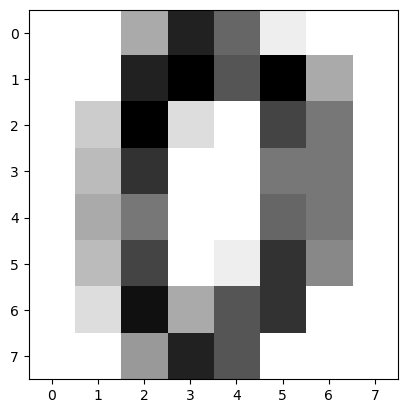

In [303]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [304]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -2))

In [305]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2)

In [306]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

In [307]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [308]:
# 3. 예측
y_pred = knn.predict(X_test)

# 4. 정확도
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 5. F1-score (다중 클래스의 경우 macro/weighted 옵션 사용)
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")

# 6. Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9917
F1 Score (weighted): 0.9916
Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  1  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  1  0  0  0  1 32]]


In [309]:
# 전체 데이터 shape 확인
print("전체 X 데이터 shape:", data.shape)             # 예: (1797, 64)
print("전체 y 데이터 shape:", digits.target.shape)    # 예: (1797,)

전체 X 데이터 shape: (1797, 64)
전체 y 데이터 shape: (1797,)


In [310]:
#원핫 인코딩
Y = pd.get_dummies(y).values

In [311]:
X 

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [312]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [313]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

model = Sequential()
model.add(Input(shape=(64,)))                 # 입력층 (Input 레이어 따로 명시)
model.add(Dense(64, activation='relu'))       # 은닉층 1
model.add(Dense(32, activation='relu'))       # 은닉층 2
model.add(Dense(16, activation='relu'))       # 은닉층 3
model.add(Dense(10, activation='softmax'))    # 출력층

model.compile(optimizer=Adam(learning_rate=0.004),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,938 (27.10 KB)

 Trainable params: 6,938 (27.10 KB)

 Non-trainable params: 0 (0.00 B)

In [314]:
# 모델 학습
model_history = model.fit(
    x=X_train, y=y_train,
    epochs=30, batch_size=32,
    validation_data=(X_test, y_test)
)

# 예측 (확률 벡터)
y_pred = model.predict(X_test)

# 확률 → 클래스 (argmax)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.1845 - loss: 3.7927 - val_accuracy: 0.3750 - val_loss: 1.7723
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4620 - loss: 1.5064 - val_accuracy: 0.5750 - val_loss: 1.1396
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6404 - loss: 0.9894 - val_accuracy: 0.7694 - val_loss: 0.6786
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8639 - loss: 0.4377 - val_accuracy: 0.8972 - val_loss: 0.3622
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9032 - loss: 0.2536 - val_accuracy: 0.9361 - val_loss: 0.2520
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9664 - loss: 0.1217 - val_accuracy: 0.9250 - val_loss: 0.2531
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9558 - loss: 0.1289 - val_accuracy: 0.9361 - val_loss: 0.2233
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9679 - loss: 0.0917 - val_accuracy: 0.9528 - v

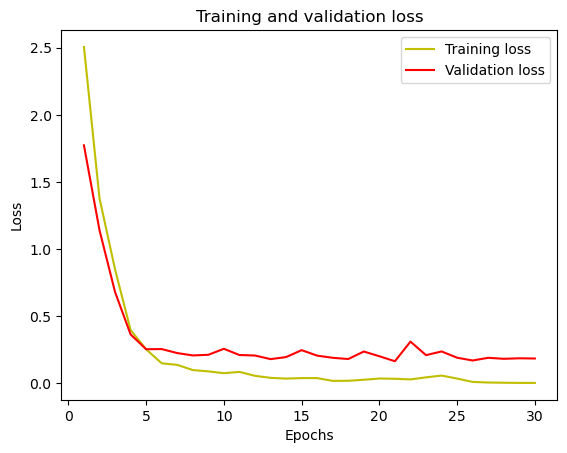

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

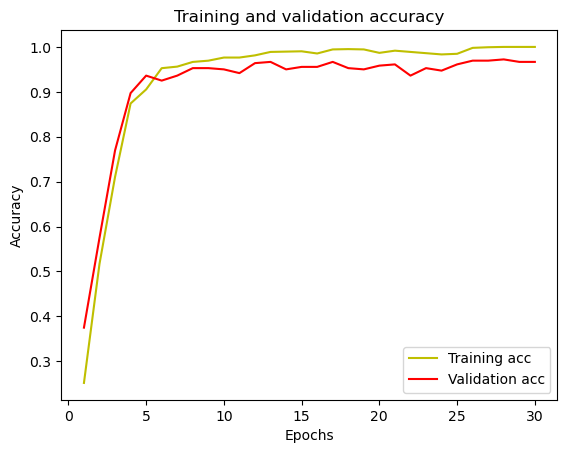

In [331]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [333]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.94      0.94      0.94        35
           2       0.97      1.00      0.99        36
           3       1.00      0.97      0.98        29
           4       0.94      0.97      0.95        30
           5       0.95      0.95      0.95        40
           6       1.00      0.98      0.99        44
           7       0.97      0.95      0.96        39
           8       1.00      0.95      0.97        39
           9       0.91      0.98      0.94        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  1  0  0  0  0  1]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  1  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  2]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0

In [335]:
from sklearn.metrics import mean_squared_error

# 예측값: softmax 확률 출력
y_pred = model.predict(X_test)

# 실제값: 이미 one-hot 인코딩된 상태 (y_test)
mse = mean_squared_error(y_test, y_pred)
print(f"📉 MSE (Mean Squared Error): {mse:.6f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
📉 MSE (Mean Squared Error): 0.005377
